In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import umap
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('imports-85.data')

In [3]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['convertible'] = LE.fit_transform(df['convertible'])
df['convertible'].nunique()

5

In [5]:
df['two'] = pd.get_dummies(df['two'])
df['gas'] = pd.get_dummies(df['gas'])
df['std'] = pd.get_dummies(df['std'])
df['rwd'] = pd.get_dummies(df['rwd'])
df['front'] = pd.get_dummies(df['front'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null uint8
std            204 non-null uint8
two            204 non-null uint8
convertible    204 non-null int64
rwd            204 non-null uint8
front          204 non-null uint8
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 non-nul

In [7]:
df = df.select_dtypes(exclude=['object'])

In [8]:
df.head()

,3,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,130,9.00,21,27
0,3,0,1,0,0,0,1,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,1,0,1,0,2,0,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
2,2,0,1,0,3,0,1,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
3,2,0,1,0,3,1,1,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
4,2,0,1,0,3,0,1,99.8,177.3,66.3,53.1,2507,136,8.5,19,25


In [9]:
X = df.iloc[:,:16]
X_std = StandardScaler().fit_transform(X)

## Dimensionality Reduction

### PCA

In [10]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

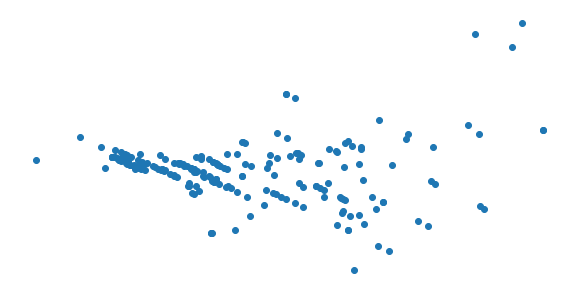

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.000s...
[t-SNE] Computed neighbors for 204 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 22.678389
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.167507
[t-SNE] KL divergence after 300 iterations: 0.162424


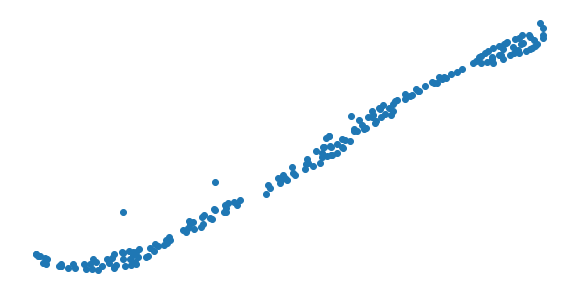

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## UMAP reduction

In [14]:
umap_results = umap.UMAP(n_neighbors=6,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

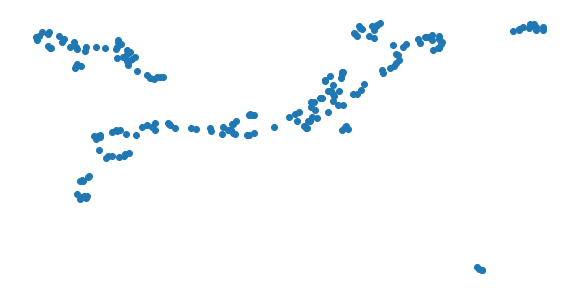

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP did a better job in classyfing the different number of legs of an animal

# Clustering

## K-means clustering

In [16]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

24.1 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


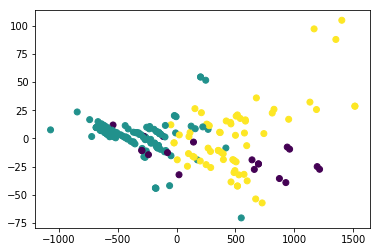

In [17]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y_pred)
plt.show()

## Heirarchical agglomerative clustering

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

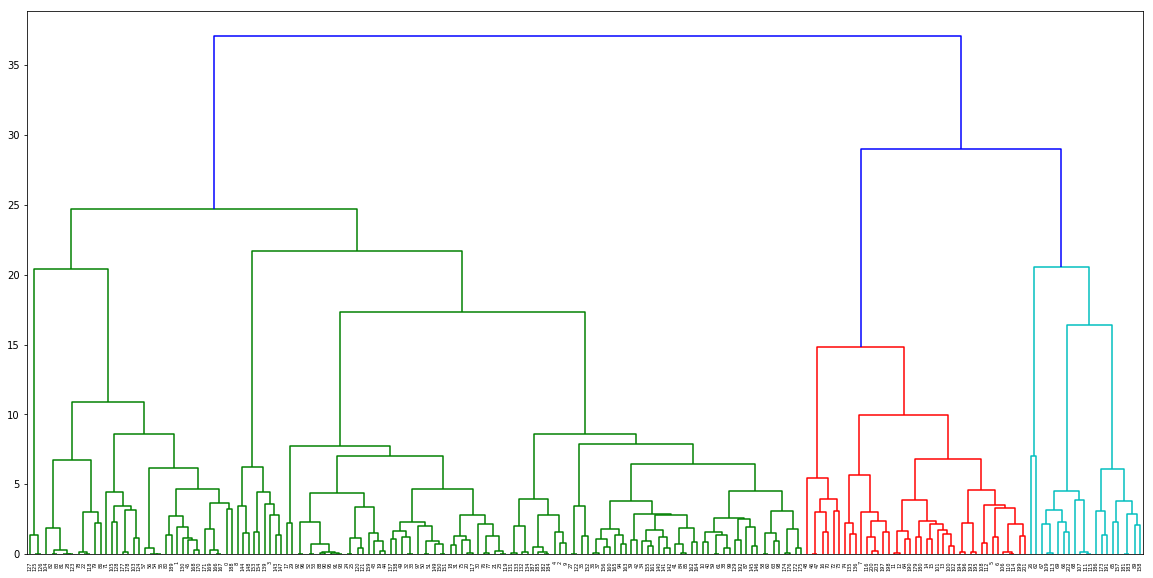

In [19]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

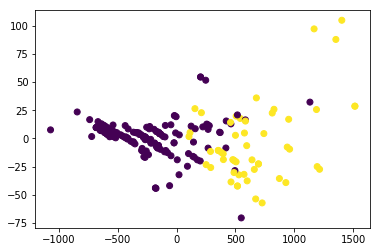

In [20]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.show()

## DBSCAN

In [21]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=3, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

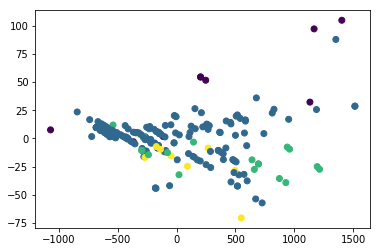

In [22]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.show()

## Gaussian Mixture Model

In [23]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

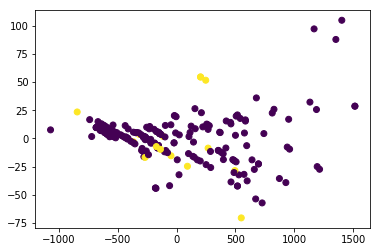

In [24]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.show()

### Summary
* After reducing the dimensions, we were able to visuazie and understand the data better.